## Stampa dei custom terms

I custom term sono termini specifici del dominio che sono aggiunti direttamente al dizionario di spacy.

In [41]:
import pandas as pd
import ast

with open("customTerms.txt", "r") as f:
    file_content = f.read()
custom_terms = ast.literal_eval(file_content.split('=')[1].strip())
df = pd.DataFrame(custom_terms)
df

,label,pattern
0,nonRenewableSource,coal
1,nonRenewableSource,oil
2,nonRenewableSource,crude oil
3,nonRenewableSource,gas
4,nonRenewableSource,nuclear
5,nonRenewableSource,fossil
6,renewableSource,solar
7,renewableSource,wind
8,renewableSource,hydropower
9,renewableSource,geothermal


## Analysis of the documents WordEnergyOutlook2024

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import spacy
from spacy import displacy

#Cariamento del documento
nlp = spacy.load("en_core_web_trf")
doc = spacy.tokens.Doc(nlp.vocab)
with open(f"doc.spacy", 'rb') as f:
    doc.from_bytes(f.read())

In [18]:
#Il metodo get_entity_frequency restituisce un dizionario con la frequenza delle entità presenti nel documento e il numero totale di entità
def get_entity_frequency(doc):
    entities = {}
    count = 0
    for ent in doc.ents:
        count += 1
        if ent.label_ in entities:
            entities[ent.label_] += 1
        else:
            entities[ent.label_] = 1
    return entities,count

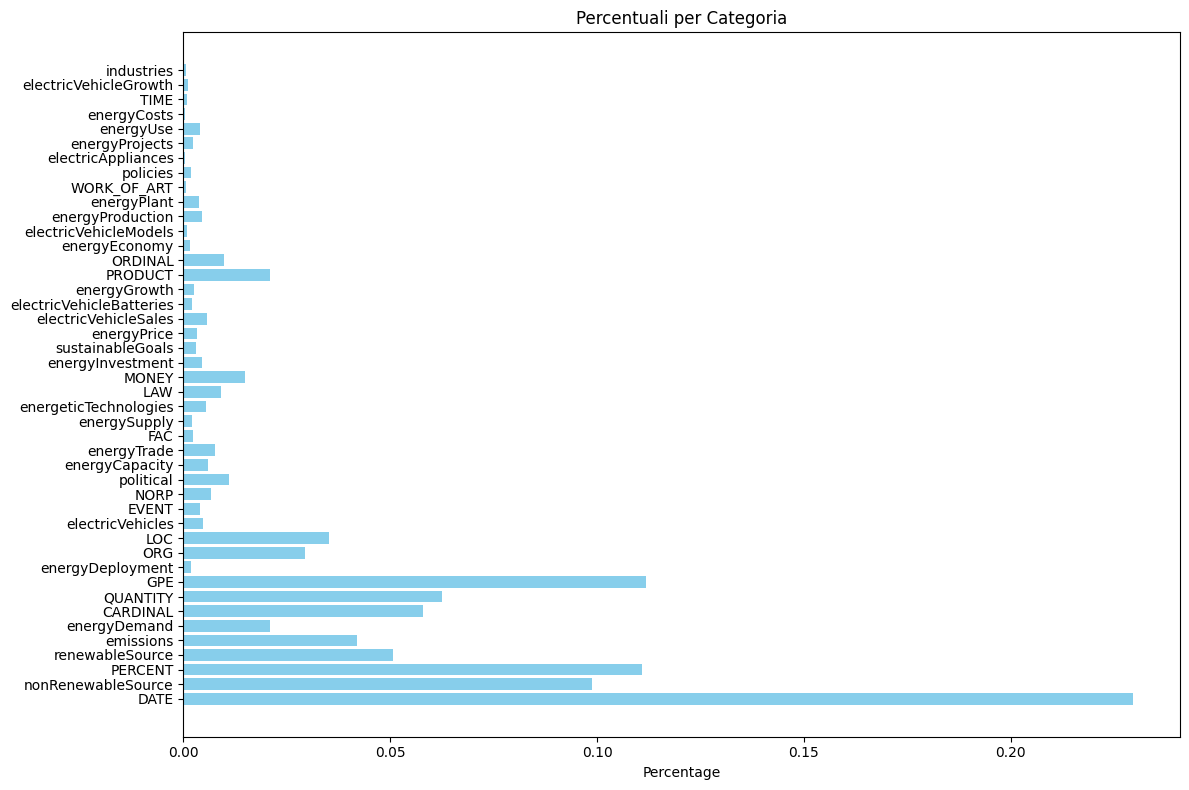

['DATE', 'nonRenewableSource', 'PERCENT', 'renewableSource', 'emissions', 'energyDemand', 'CARDINAL', 'QUANTITY', 'GPE', 'energyDeployment', 'ORG', 'LOC', 'electricVehicles', 'EVENT', 'NORP', 'political', 'energyCapacity', 'energyTrade', 'FAC', 'energySupply', 'energeticTechnologies', 'LAW', 'MONEY', 'energyInvestment', 'sustainableGoals', 'energyPrice', 'electricVehicleSales', 'electricVehicleBatteries', 'energyGrowth', 'PRODUCT', 'ORDINAL', 'energyEconomy', 'electricVehicleModels', 'energyProduction', 'energyPlant', 'WORK_OF_ART', 'policies', 'electricAppliances', 'energyProjects', 'energyUse', 'energyCosts', 'TIME', 'electricVehicleGrowth', 'industries']


In [24]:
entitis,entitis_number= get_entity_frequency(doc)
    
labels = list(entitis.keys())
values = list(entitis.values())
values = [v/entitis_number for v in values]

#Creazione del grafico a barre
plt.figure(figsize=(12, 8))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Percentage")
plt.title("Percentuali per Categoria")
plt.tight_layout()  # Adatta il layout per evitare sovrapposizioni
plt.show()
print(labels)

In [22]:
#Il metodo count_words_by_label, data una label, restituisce un dataframe con i termini associati a quella label ordinati per frequenza

def count_words_by_label(doc, label):
    words = [ent.text for ent in doc.ents if ent.label_ == label]
    word_counts = Counter(words)
    df = pd.DataFrame(word_counts.items(), columns=["Word", "Count"])
    df = df.sort_values(by="Count", ascending=False).reset_index(drop=True)
    
    return df

In [25]:
count_words_by_label(doc,"sustainableGoals")

,Word,Count
0,emissions reductions,11
1,climate goals,5
2,emissions goals,2
3,emissions reduction goals,2
4,energy access goals,2
5,Emissions reductions,1
6,energy transition goals,1
7,temperature goals,1


In [26]:
#Il metodo display_sentence_with_entity, dato un termine target, stampa la visualizzazione delle entità e delle dipendenze della
# prima frase in cui il termine è presente

def display_sentence_with_entity(doc, target_word):
    for ent in doc.ents:
        if ent.text == target_word:
            sentence = ent.sent
            print("Entities visualization:")
            displacy.render(sentence, style="ent", jupyter=True)
            print("Dependencies visualization:")
            displacy.render(sentence, style="dep", jupyter=True)
            break  

In [30]:
display_sentence_with_entity(doc, "emissions goals")

Entities visualization:


Dependencies visualization:
